Upload the image to be histogram matched:


Saving g.png to g.png
Upload the reference image:


Saving download.jpg to download.jpg


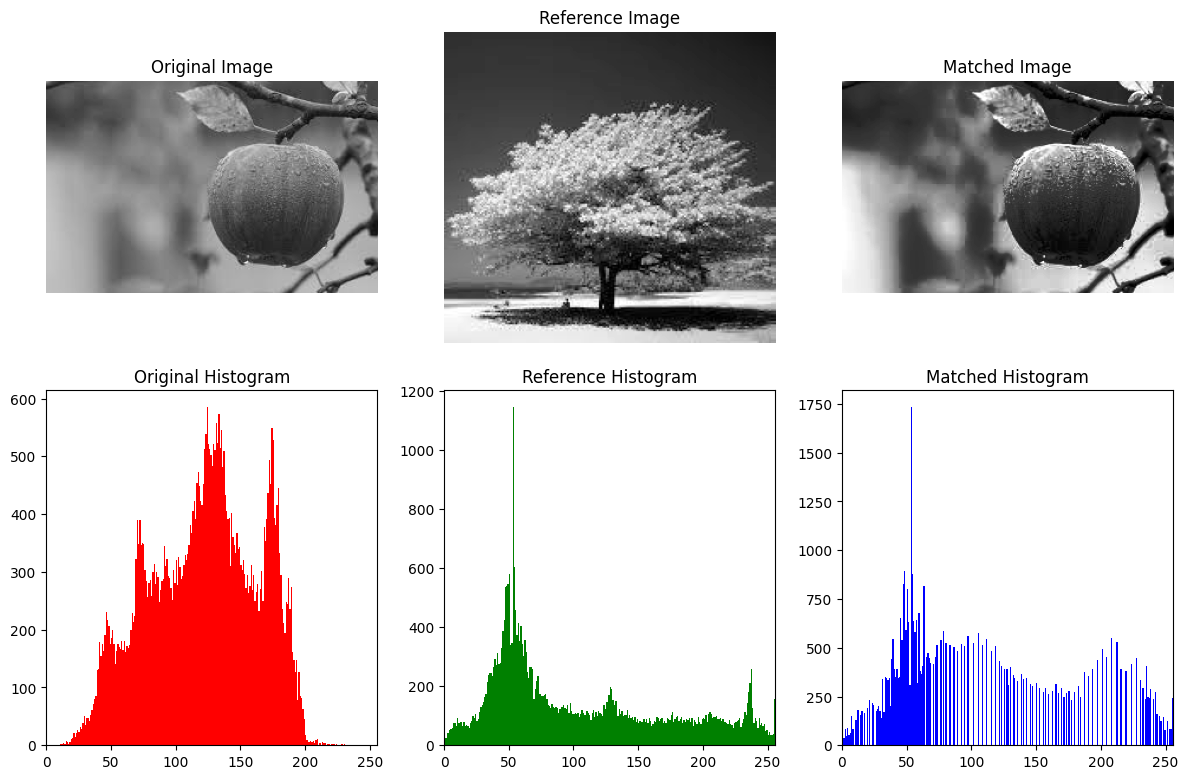

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def histogram_matching(image, reference_image):

    hist_source, bins_source = np.histogram(image.flatten(), bins=256, range=(0, 256))
    hist_reference, bins_reference = np.histogram(reference_image.flatten(), bins=256, range=(0, 256))


    cdf_source = hist_source.cumsum()
    cdf_reference = hist_reference.cumsum()


    normalized_source = cdf_source / cdf_source[-1]
    normalized_reference = cdf_reference / cdf_reference[-1]


    mapping = np.zeros(256, dtype=np.uint8)
    j = 0
    for i in range(256):
        while j < 256 and normalized_reference[j] < normalized_source[i]:
            j += 1
        mapping[i] = j


    matched_image = mapping[image]

    # Plot the histograms and images
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(reference_image, cmap='gray')
    plt.title('Reference Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(matched_image, cmap='gray')
    plt.title('Matched Image')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.hist(image.flatten(), bins=256, range=(0, 256), color='r')
    plt.title('Original Histogram')
    plt.xlim([0, 256])

    plt.subplot(2, 3, 5)
    plt.hist(reference_image.flatten(), bins=256, range=(0, 256), color='g')
    plt.title('Reference Histogram')
    plt.xlim([0, 256])

    plt.subplot(2, 3, 6)
    plt.hist(matched_image.flatten(), bins=256, range=(0, 256), color='b')
    plt.title('Matched Histogram')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

    return matched_image

def upload_image():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        return image
    else:
        print("No files were uploaded.")
        return None

def main():
    print("Upload the image to be histogram matched:")
    image = upload_image()

    if image is None:
        return

    print("Upload the reference image:")
    reference_image = upload_image()

    if reference_image is None:
        return

    matched_image = histogram_matching(image, reference_image)

if __name__ == "__main__":
    main()
